<a href="https://colab.research.google.com/github/ttruong1000/MAT-494-Mathematical-Methods-for-Data-Science/blob/main/2_2_Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.2 - Probability Distributions**

### **2.2.0 - Python Libraries for Probability Distributions**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import expon

### **2.2.1 - Axioms of Probability**

##### Definition 2.2.1.1 - Sample Space

The sample space of an experiment, denoted by $S$, is the set of all possible outcomes of that experiment.

##### Definition 2.2.1.2 - Events, Simple and Compound

An event is any collection (subset) of outcomes contained in the sample space $S$. An event is simple if it consists of exactly one outocme and compound if it consists of more than one outcome.

##### Definition 2.2.1.3 - Probability Distribution

Given an experiment and a sample space $S$, the probability distribution is a function which assigns to each event $A$ a number $P(A)$, the probability of event $A$, which gives a precise measure of the chance that $A$ will occur. Alternatively, a probability distribution is the mathematical function that gives the probabilities of the occurrences of different possible outcomes for an experiment.

##### Definition 2.2.1.4 - Axioms of Probability

Probability follows the following axioms:
- For any event $A$, $0 \leq P(A) \leq 1$.
- $P(S) = 1$, where $S$ is the sample space.
- If $A_1, A_2, A_3, \ldots$ is an infinite collection of disjoint events, then
\begin{equation*}
  P(A_1 \cup A_2 \cup A_3 \cup \cdots) = \sum_{i = 1}^\infty P(A_i)
\end{equation*}
- For any event $A$, $P(A) + P(A') = 1$, from which $P(A) = 1 - P(A')$, where $A'$ is the complement of $A$.
- When events $A$ and $B$ are mutually exclusive, $P(A \cup B) = P(A) + P(B)$.
- (Principle of Inclusion-Exclusion) For any two events $A$ and $B$,
\begin{equation*}
  P(A \cup B) = P(A) + P(B) - P(A \cap B)
\end{equation*}

##### Definition 2.2.1.5 - Equally Likely Outcomes

If there are $n$ equally likely outcomes, the probability for each event is $\frac{1}{n}$. Consider an event $A$, with $N(A)$ denoting the number of outcomes contained in $A$. Then,
\begin{equation*}
  P(A) = \frac{N(A)}{N}
\end{equation*}

### **2.2.2 - Conditional Probability**

##### Definition 2.2.2.1 - Conditional Probability

For any two events $A$ and $B$ with $P(B) > 0$, the conditional probability of $A$ given that $B$ has occurred is defined by
\begin{equation*}
  P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation*}

##### Definition 2.2.2.2 - Independence and Dependence for Two Events

Two events $A$ and $B$ are independent if $P(A|B) = P(A)$ or $P(A \cap B) = P(A)P(B)$. If this is otherwise, two events $A$ and $B$ are dependent.

##### Definition 2.2.2.3 - Independence for $n$ Events

Events $A_1, A_2, \ldots, A_n$ are mutually independent if for every $k = 2, 3, \ldots, n$ and every subset of indices $i_1, i_2, \ldots, i_k$,
\begin{equation*}
  P(A_{i_1} \cap A_{i_2} \cap \cdots \cap A_{i_k}) = P(A_{i_1})P(A_{i_2}) \cdots P(A_{i_k})
\end{equation*}

### **2.2.3 - Discrete Random Variables**

##### Definition 2.2.3.1 - Random Variables

For a given sample space $S$ of some experiment, a random variable is any rule that associates a number with each outcome in $S$. Mathematically, a random variable is a function whose domain is the sample space and whose range is the set of real numbers.

##### Definition 2.2.3.2 - Discrete Random Variables

A discrete random variable is a random variable whose possible values either constitute a finite set or else can be listed in an infinite sequence. A random variable is continuous if both of the following apply.
- Its set of possible values consists of all numbers in a single interval on the number line.
- $P(X = c) = 0$ for any possible value of $c$.

##### Definition 2.2.3.3 - Probability Mass Function (PMF)

The probability distribution or probability mass function (pmf) of a discrete random variable is defined for every number $x$ by
\begin{equation*}
  p(x) = P(X = x) = P(\text{\{all $s \in S$ | $X(s) = X$}\})
\end{equation*}

##### Definition 2.2.3.4 - Cumulative Distribution Function (CDF)

The cumulative distribution function (CDF) $F(x)$ of a discrete random variable $X$ with PMF $p(x)$ is defined for every number $x$ by
\begin{equation*}
  F(x) = P(X \leq x) = \sum_{y| y \leq x}p(y)
\end{equation*}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


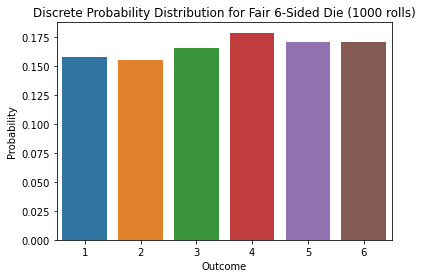

In [38]:
# Uniform Distribution - Dice Rolls
NUM_ROLLS = 1000

values = [1, 2, 3, 4, 5, 6]
sample = np.random.choice(values, NUM_ROLLS)

# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)
probs = count / len(sample)

# Plot the results
sns.barplot(side, probs)
plt.title(
    f"Discrete Probability Distribution for Fair 6-Sided Die ({NUM_ROLLS} rolls)")
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


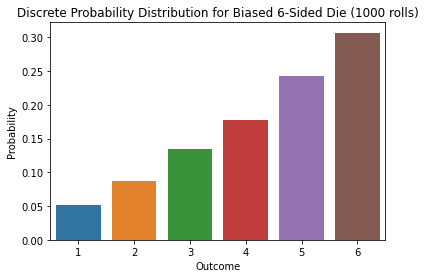

In [37]:
# Weighted Dice Rolls
NUM_ROLLS = 1000

values = [1, 2, 3, 4, 5, 6]
probs = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

# Draw a weighted sample
sample = np.random.choice(values, NUM_ROLLS, p=probs)

# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)
probs = count / len(sample)

# Plot the results
sns.barplot(side, probs)
plt.title(
    f"Discrete Probability Distribution for Biased 6-Sided Die ({NUM_ROLLS} rolls)")
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()

##### Definition 2.2.3.5 - Bernoulli Random Variables, CDF, PDF

Any random variables whose only possible values are 0 and 1 are called Bernoulli random variables. Given Bernoulli experiments with outcomes S (success) and F (failure). The binomial random variable $X$ associated with independent Bernoulli experiment consisting of $n$ trials is defined as
\begin{equation*}
  X = \text{ the number of $S$'s among the $n$ trials}
\end{equation*}
The probability of success is $p$ from trial to trial. The PMF of $X$ has the form
\begin{equation*}
  b(x; n, p) = \begin{cases}
    \binom{n}{x}p^x(1-p)^{n - x} &\text{ $x = 0, 1, 2, 3, \ldots, n$} \\
    0 &\text{ otherwise}
  \end{cases}
\end{equation*}
and the CDF of $X$ has the form
\begin{equation*}
  B(x; n, p) = P(X \leq x) = \sum_{y|y \leq x}b(x; n, p) = \sum_{y = 0}^x \binom{n}{y}p^x(1 - p)^{n - x}
\end{equation*}

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

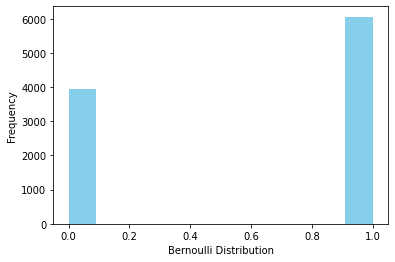

In [36]:
# Bernoulli Distribution
data_bern = bernoulli.rvs(size=10000,p=0.6)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

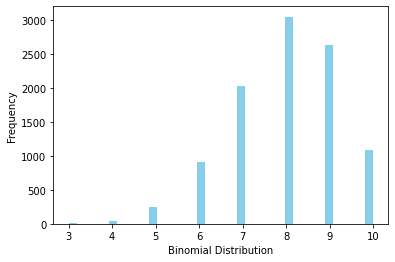

In [35]:
# Binomial Distribution
data_binom = binom.rvs(n=10,p=0.8,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

##### Definition 2.2.3.6 - Poisson Distribution, PDF, CDF

The Poisson distribution is a discrete probability distribution that describes the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. A discrete random variable $X$ is said to have a Poisson distribution with parameter $\mu$ is the PMF of $X$ is
\begin{equation*}
  p(x;\mu) = \frac{e^{-\mu}\mu^x}{x!} \quad x = 0, 1, 2, 3, \ldots
\end{equation*}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

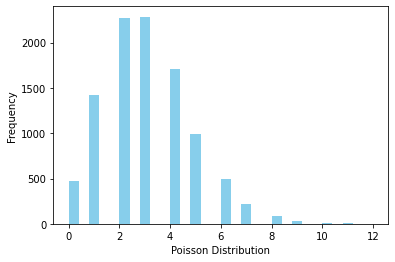

In [34]:
# Poisson Distribution
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

##### Definition 2.2.3.7 - Expected Value of Discrete Random Variables $X$

Let $X$ be a discrete random variables with set of possible values $D$ and PMF $p(x)$. The expected value or mean value of $X$, denoted by $E(X)$, $\mu_X$, or $\mu$, is
\begin{equation*}
  E(X) = \mu_X = \mu = \sum_{x \in D}xp(x)
\end{equation*}

Proposition 2.2.3.8 - Linearity of Expectation

If the random variable $X$ has a set of possible values $D$ and PMF $p(x)$, then the expected value of any function $h(X)$, denoted by $E[h(X)]$ or $\mu_{h(X)}$, is computed by
\begin{equation*}
  E[h(X)] = \sum_D h(x)p(x)
\end{equation*}
In particular,
\begin{equation*}
  E(aX+  b) = aE(x) + b
\end{equation*}

##### Definition 2.2.3.9 - Variance and Standard Deviation of Discrete Random Variables

Let $X$ have a PMF $p(x)$ and expected value $\mu$. Then, the variance of $X$, denoted by $V(X)$, $\sigma^2_X$, or $\sigma^2$, is
\begin{equation*}
  V(X) = \sum_D (x - \mu)^2p(x) = E[(X - \mu)^2]
\end{equation*}
The standard deviation (SD) of $X$ is
\begin{equation*}
  \sigma_X = \sqrt{\sigma^2_X}
\end{equation*}

##### Proposition 2.2.3.10 - Properties of Variance and Standard Deviation

The expected value and variance of discrete random variables have the following properties.
\begin{equation*}
  V(aX+  b) = \sigma^2_{aX + b} = a^2\sigma^2_X \quad \text{ and } \quad \sigma_{aX + b} = |a|\sigma_X
\end{equation*}
In particular,
\begin{equation*}
  \sigma_{aX} = |a|\sigma_X \quad \sigma_{X + b} = \sigma_X
\end{equation*}

##### Proposition 2.2.3.11 - Properties of Variance and Standard Deviation for Binomial and Poisson Distributions

- If $X$ is a binomial random variable with parameters $n, p$, then $E(X) = np$, $V(X) = np(1 - p)$, and $\sigma = \sqrt{np(1 - p)}$.
- If $X$ is a Poisson random variable with parameters $\mu$, then $E(X) = \mu$, $V(X) = \mu$, and $\sigma = \sqrt{\mu}$.

### **2.2.4 - Continuous Random Variables**

##### Definition 2.2.4.1 - Continuous Random Variables

Let $X$ be a continuous random variable. Then, a probability distribution or probability density function (PDF) of $X$ is a function $f(x)$ such that for any two numbers $a$ and $b$ with $a \leq b$,
\begin{equation*}
  P(a \leq X \leq b) = \int_a^b f(x) \ dx
\end{equation*}
The probability that $X$ takes on a value in the interval $[a, b]$ is the area above this interval and under the graph of the density function $f(x)$. This function $f(x)$ must satisfy the following two conditions.
- $f(x) \geq 0$ for all $x$
- $\int_{-\infty}^{\infty} f(x) \ dx = \text{ the total area under the entire graph of $f(x)$}$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

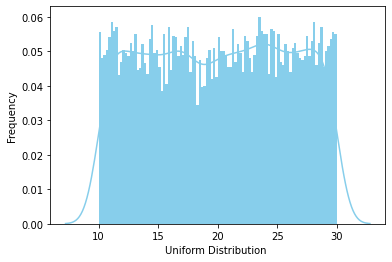

In [33]:
# Uniform Distribution
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

##### Definition 2.2.4.2 - Expected Value of Continuous Random Variables

The expected or mean value of a continuous random variable $X$ with PDF $f(x)$ is
\begin{equation*}
  E(X) = \mu_X = \mu = \int_{-\infty}^{\infty} xf(x) \ dx
\end{equation*}

##### Definition 2.2.4.3 - Variance and Standard Deviation of Continuous Random Variables

The variance of a continuous random variable $X$ with PDF $f(x)$ and the variance is $\mu$ is
\begin{equation*}
  V(X) = \sigma^2_X = \sigma^2 = \int_{-\infty}^{\infty} (x - \mu)^2 f(x) \ dx = E[(X - \mu)^2]
\end{equation*}
The standard deviation (SD) of $X$ of $\sigma_X = \sqrt{V(X)}$.

##### Proposition 2.2.4.4 - Properties of Expected Value, Variance, and Standard Deviation of Continuous Random Variables

The expected value and variance of continuous random variables have the following properties.
- If $X$ is a continuous random variable with PDF $f(x)$ and the variance is $\mu$ is
\begin{equation*}
  E[h(X)] = \mu_{h(X)} = \int_{-\infty}^{\infty} h(x)f(x) \ dx
\end{equation*}
- $V(X) = E(X^2) - [E(X)]^2$

##### Definition 2.2.4.5 - Exponential Distribution, PDF, CDF, Expected Value, Variance, Standard Deviation

A continuous random variable $X$ has an exponential distribution with parameter $\lambda > 0$ if the PDF of $X$ is
\begin{equation*}
  f(x; \lambda) = \begin{cases}
    \lambda e^{-\lambda x} &\text{ $x \geq 0$} \\
    0 &\text{ otherwise}
  \end{cases}
\end{equation*}
The expected value of an exponential random variable $X$ is found by doing the integral
\begin{equation*}
  E(X) = \int_0^\infty x\lambda e^{-\lambda x} \ dx
\end{equation*}
in which
\begin{equation*}
  \mu = \sigma = \frac{1}{\lambda} \quad \sigma^2 = \frac{1}{\lambda^2}
\end{equation*}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

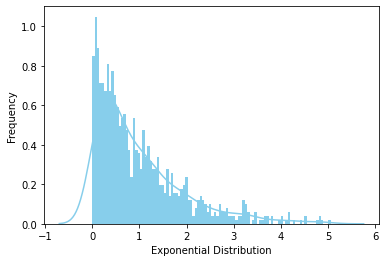

In [32]:
# Exponential Distribution
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

##### Definition 2.2.4.6 - Normal Distribution

A continuous random variable $X$ has a normal distribution with parameters $\mu$ and $\sigma$ (or $\sigma^2$), where $-\infty < \mu < \infty$ and $\sigma > 0$, if the PDF of $X$ is
\begin{equation*}
  f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{equation*}
The computation of $P(a \leq X \leq b)$ when $X$ is a normal random variable with parameters $\mu$ and $\sigma$ requires evaluating
\begin{equation*}
  P(a \leq X \leq b) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x - \mu)^2}{2\sigma^2}} \ dx
\end{equation*}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

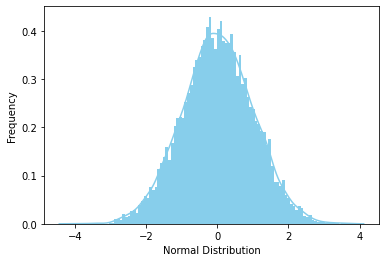

In [31]:
# Normal Distribution
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

##### Definition 2.2.4.7 - Standard Normal Distribution

The normal distribution with parameter values $\mu = 0$ and $\sigma = 1$ is called the standard normal distribution. A random variable having a standard normal distribution is called a standard normal random variable and will be denoted by $Z$. The PDF of $Z$ is
\begin{equation*}
  f(z;0, 1) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} \quad -\infty < z < \infty
\end{equation*}
The graph of $f(z;0, 1)$ is called the standard normal (or $z$) curve. Its inflection points occur at $z = -1$ and $z = 1$. The CDF of $Z$ is $P(Z \leq z) = \int_{-\infty}^z f(y;0,1) \ dy$, which we will denote by $\Phi(z)$.

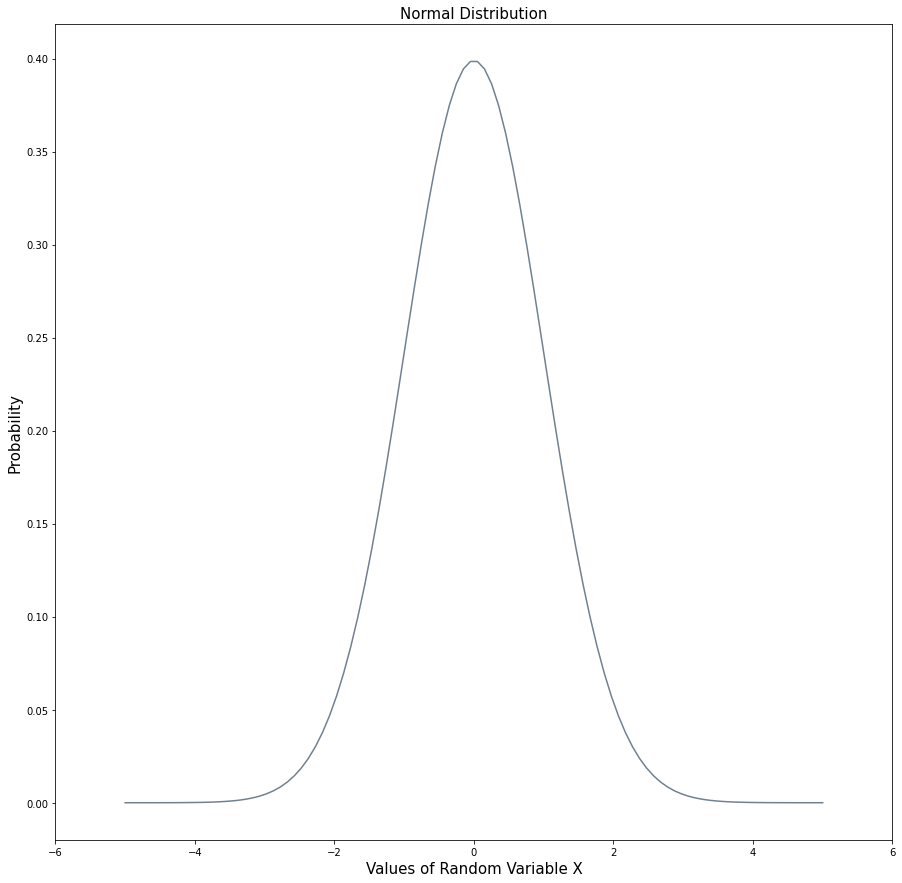

In [30]:
# Create a standard normal distribution
Mean = 0
StandardDeviation = 1
snd = stats.norm(Mean, StandardDeviation)
# Generate 100 random values between -5 and 5
x = np.linspace(-5, 5, 100)
# Plot the standard normal distribution for different values of random variable
# falling in the range -5, 5
plt.figure(figsize=(15,15))
plt.plot(x, snd.pdf(x), color='slategray')
plt.xlim(-6, 6)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

Proposition 2.2.4.8 - Z-Score

If $X$ has a normal distribution with mean $\mu$ and standard deviation $\sigma$, then the Z-score
\begin{equation*}
  Z = \frac{X - \mu}{\sigma}
\end{equation*}
has a standard normal distrbution. Thus,
\begin{equation*}
  P(a \leq X \leq b) = P\left(\frac{a - \mu}{\sigma} \leq Z \leq \frac{b - \mu}{\sigma}\right) = \Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right)
\end{equation*}
\begin{equation*}
  P(X \leq a) = \Phi\left(\frac{a - \mu}{\sigma}\right) \quad P(X \geq b) = 1 - \Phi\left(\frac{b - \mu}{\sigma}\right)
\end{equation*}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

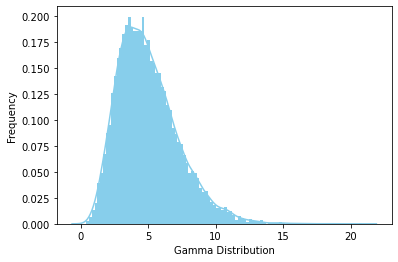

In [29]:
# Gamma Distribution
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### **2.2.5 - References**

1. MAT 494 Chapter 2 Lecture Notes
2. https://compucademy.net/discrete-probability-distributions-with-python/
3. https://www.datacamp.com/tutorial/probability-distributions-python